# Decision Tree Model: Hurricanes and Typhoons

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('max_columns', 200)

In [3]:
# data loading
data = pd.read_csv("./Datasets/pacific.csv")
data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


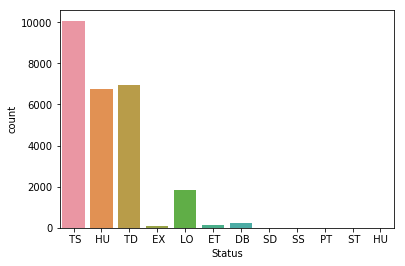

In [4]:
# data visualization
sns.countplot(data['Status'])
plt.show()

In [5]:
# data wrangling
data.head()
relevant_data = data.drop(['Event','ID', 'Name', 'Date', 'Time', 'Latitude', 'Longitude'],
         axis=1)
relevant_data.head()

,Status,Maximum Wind,Minimum Pressure,Low Wind NE,Low Wind SE,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,TS,45,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [32]:
# train - test split
train, test = train_test_split(relevant_data, test_size=0.3,random_state =85)
print(train.shape)
print(test.shape)

(18295, 15)
(7842, 15)


In [33]:
train_Y = train.pop('Status')  # pop , pops out the column.
train_X = train

In [34]:
test_Y = test.pop('Status')  # pop , pops out the column.
test_X = test

In [35]:
train_X.dtypes

Maximum Wind        int64
Minimum Pressure    int64
Low Wind NE         int64
Low Wind SE         int64
Low Wind SW         int64
Low Wind NW         int64
Moderate Wind NE    int64
Moderate Wind SE    int64
Moderate Wind SW    int64
Moderate Wind NW    int64
High Wind NE        int64
High Wind SE        int64
High Wind SW        int64
High Wind NW        int64
dtype: object

In [36]:
# let's build the model
model = tree.DecisionTreeClassifier()
# train or model fitting
model.fit(train_X, train_Y)

# testing
y_pred = model.predict(test_X)

# checking the performance of the model
metrics.accuracy_score(test_Y, y_pred)
# 95.6%

0.9566437133384341

In [37]:
input_columns = train_X.columns
tree.export_graphviz(model,
                     out_file='decision_tree.dot',
                     feature_names=input_columns)
# paste the binary file O/P in http://www.webgraphviz.com/

# Random Forest

In [38]:
# data visualization, wrangling we have done already
# let's build the model then
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators=100)

# training
random_model.fit(train_X, train_Y)

# testing
y_pred = random_model.predict(test_X)

# accoracy
metrics.accuracy_score(test_Y, y_pred)
# 95.7 % accuracy

0.958301453710788